<a href="https://colab.research.google.com/github/Dumisani23/black-panther-machine/blob/main/AM_Float_Feed_Feature_Importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")

# 1. **Data Exploration**

In [ ]:
#read the data
df = pd.read_csv("/content/AM1 Density_Feature Importance.csv")

#check data frame shape
df.shape

(421920, 4)

In [ ]:
# check column names and first few rows
df.head()

,AM1 Float Feed Density,AM1 Water Addition Valve position,Cyclone Feed Pressure,Cyclone Feed Sump Water Addition flow
0,1.477408227,46.95686623,24.51239008,17.1589504
1,1.475188152,52.00265448,24.22652254,16.87882038
2,1.468827758,51.29035355,23.8649161,16.72785956
3,1.471042226,49.06523479,23.72534245,16.71752827
4,1.480084409,48.94500615,24.50048181,17.18872331


In [ ]:
# check data types
df.dtypes

,0
AM1 Float Feed Density,object
AM1 Water Addition Valve position,object
Cyclone Feed Pressure,object
Cyclone Feed Sump Water Addition flow,object


In [ ]:
# check for missing values
df.isnull().sum()

,0
AM1 Float Feed Density,0
AM1 Water Addition Valve position,0
Cyclone Feed Pressure,0
Cyclone Feed Sump Water Addition flow,0


In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

display(df.dtypes)

,0
AM1 Float Feed Density,float64
AM1 Water Addition Valve position,float64
Cyclone Feed Pressure,float64
Cyclone Feed Sump Water Addition flow,float64


In [ ]:
# Replace "No data" with NaN
df = df.replace("No data", pd.NA)

# remove rows with na
df = df.dropna()

In [ ]:
# Remove rows where 'AM1 Float Feed Density' is below or equal to 1
df_filtered = df[df['AM1 Float Feed Density'] > 1].copy()

# Display the shape of the filtered DataFrame
print("Shape of the DataFrame after removing rows with 'AM1 Float Feed Density' below or equal to 1:", df_filtered.shape)

Shape of the DataFrame after removing rows with 'AM1 Float Feed Density' below or equal to 1: (376928, 4)


<Axes: xlabel='AM1 Float Feed Density', ylabel='Count'>

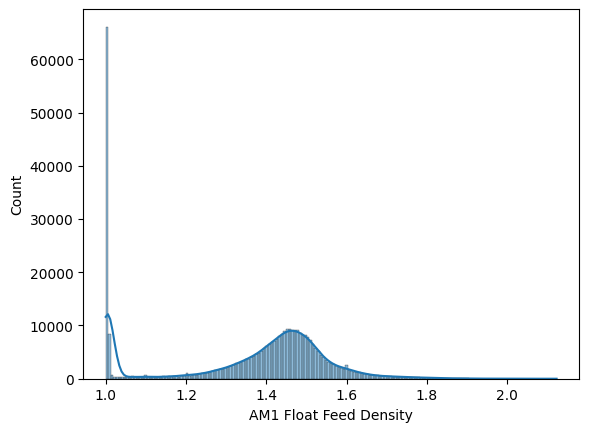

In [ ]:


# Check distribution of target variable
sns.histplot(data=df_filtered, x="AM1 Float Feed Density", kde=True)

# **2. Data Preprocessing**

In [ ]:
# Replace "No data" with NaN
df = df.replace("No data", pd.NA)

# remove rows with na
df = df.dropna()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# split data into input and target value
X = df.drop("AM1 Float Feed Density", axis=1)
y = df["AM1 Float Feed Density"]

# standardization of input data
scaler = preprocessing.StandardScaler()

X_normalized_values = scaler.fit_transform(X.values)

X_normalized = pd.DataFrame(X_normalized_values, columns=X.columns, index=X.index)

# split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.10, random_state=42)

# **3. Feature Importance**

**Logistic Regression - Coefficients**

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# initialize linear regression model and fit to training data
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# obtain coefficients
coefficients = linreg.coef_.reshape(-1)

# present features and absolute values of coefficients in a dataframe
logreg_fi_df = pd.DataFrame(data = {'Feature': X.columns, 'Importance': np.abs(coefficients)}).sort_values(by = "Importance", ascending = False)

display(logreg_fi_df)

,Feature,Importance
1,Cyclone Feed Pressure,0.174809
2,Cyclone Feed Sump Water Addition flow,0.020743
0,AM1 Water Addition Valve position,0.019523


**Gradient Boosting Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# initialize gradient boosting regressor and fit to training data
clf = GradientBoostingRegressor(random_state=42)
clf.fit(X_train, y_train)

# calculate feature importance
feature_importance = clf.feature_importances_

# present features and standardized decrease in gini impurity in a dataframe
gbr_fi_df = pd.DataFrame(data = {'Feature': X.columns, 'Importance': feature_importance}).sort_values(by = "Importance", ascending = False)

display(gbr_fi_df)


,Feature,Importance
1,Cyclone Feed Pressure,0.964076
0,AM1 Water Addition Valve position,0.022634
2,Cyclone Feed Sump Water Addition flow,0.013291


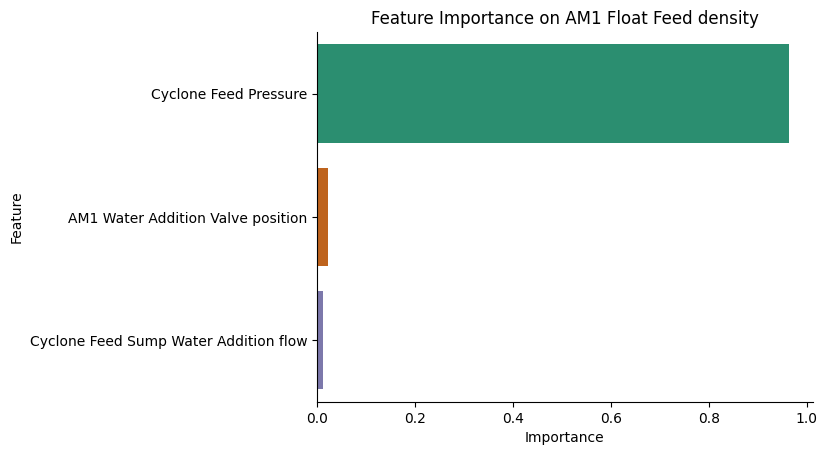

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Create a bar plot with 'Importance' on the x-axis and 'Feature' on the y-axis
sns.barplot(x='Importance', y='Feature', data=gbr_fi_df, palette=sns.palettes.mpl_palette('Dark2'))

# Remove the top and right spines for better aesthetics
plt.gca().spines[['top', 'right',]].set_visible(False)

# Add a title to the plot
plt.title('Feature Importance on AM1 Float Feed density')

plt.show()